# LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import preprocessing
from plotly import express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

# DATASET

In [8]:
data = pd.read_csv('./data/chotot.csv')

In [ ]:
data.head()

Unnamed: 0                                            subject  size  \
0           0     Bán nhà Huỳnh Tấn Phát 44m2 2 tầng giá 3 tỷ 75  44.0   
1           1              Mặt Tiền Hoa Sữa. P7. khu QH miếu nổi  65.0   
2           2          NHÀ HẼM ĐỔ XUÂN HỢP. PHƯỚC LONG B. QUẬN 9  44.8   
3           3  Chính chủ cần bán nhà thạnh lộc 44 q12,hẻm xe tải  26.0   
4           4     Nhà Đẹp Ở Ngay-Nguyễn Trọng Tuyển-P2-Tân Bình.  22.0   

    width  length  room  area    ward  toilet  living size  floor  house type  \
0     3.5    12.0   2.0   102  9466.0     2.0          NaN    1.0         3.0   
1     3.8    17.0   6.0   111  9328.0     6.0        238.0    NaN         1.0   
2     3.2    14.0   2.0   104  9256.0     2.0         44.8    1.0         3.0   
3    35.0     8.0   2.0   107  9228.0     2.0         52.0    1.0         3.0   
4  3500.0  6500.0   2.0   112  9311.0     NaN         55.0    NaN         3.0   

   zero deposit  direction                street  escrow can deposit  \
0         False        NaN  Đường Huỳnh Tấn Phát                   2   
1         False        NaN         Đường Hoa Sữa                   2   
2         False        NaN     Đường Đỗ Xuân Hợp                   2   
3         False        8.0     Đường Hà Huy Giáp                   2   
4         False        1.0    Nguyễn Trọng Tuyển                   2   

   property legal document  protection entitlement  furnishing sell  \
0                      1.0                   False              1.0   
1                      1.0                   False              1.0   
2                      1.0                   False              3.0   
3                      3.0                   False              3.0   
4                      1.0                   False              NaN   

         price  
0   3750000000  
1  18500000000  
2    890000000  
3   1300000000  
4   3550000000

In [ ]:
data = data.infer_objects()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95400 entries, 0 to 95399
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               95400 non-null  int64  
 1   subject                  95400 non-null  object 
 2   size                     95396 non-null  float64
 3   width                    80154 non-null  float64
 4   length                   79228 non-null  float64
 5   room                     95396 non-null  float64
 6   area                     95400 non-null  int64  
 7   ward                     95068 non-null  float64
 8   toilet                   73393 non-null  float64
 9   living size              62158 non-null  float64
 10  floor                    60428 non-null  float64
 11  house type               95349 non-null  float64
 12  zero deposit             95400 non-null  bool   
 13  direction                28474 non-null  float64
 14  street                

In [ ]:
data.isnull().sum()

Unnamed: 0                     0
subject                        0
size                           4
width                      15246
length                     16172
room                           4
area                           0
ward                         332
toilet                     22007
living size                33242
floor                      34972
house type                    51
zero deposit                   0
direction                  66926
street                     33243
escrow can deposit             0
property legal document    21163
protection entitlement         0
furnishing sell            50326
price                          0
dtype: int64

# DATA PREPROCESSING

In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

size                        0.004193
width                      15.981132
length                     16.951782
room                        0.004193
ward                        0.348008
toilet                     23.068134
living size                34.844864
floor                      36.658281
house type                  0.053459
direction                  70.153040
street                     34.845912
property legal document    22.183438
furnishing sell            52.752621
dtype: float64

Loại bỏ các attribute nào có giá trị Nan trên 50% tổng số dữ liệu

In [ ]:
del data['furnishing sell']
del data['direction']

## Nan

In [ ]:
data.columns = ['index', *data.columns[1:]]
data['street'] = data['street'].fillna('')
imputer = KNNImputer(n_neighbors = 5)
imputer.fit(data.select_dtypes('float64'))
cols_float = list(data.select_dtypes('float64').columns)
data[cols_float] = imputer.transform(data.select_dtypes('float64'))

In [ ]:
data.head()

index                                            subject  size   width  \
0      0     Bán nhà Huỳnh Tấn Phát 44m2 2 tầng giá 3 tỷ 75  44.0     3.5   
1      1              Mặt Tiền Hoa Sữa. P7. khu QH miếu nổi  65.0     3.8   
2      2          NHÀ HẼM ĐỔ XUÂN HỢP. PHƯỚC LONG B. QUẬN 9  44.8     3.2   
3      3  Chính chủ cần bán nhà thạnh lộc 44 q12,hẻm xe tải  26.0    35.0   
4      4     Nhà Đẹp Ở Ngay-Nguyễn Trọng Tuyển-P2-Tân Bình.  22.0  3500.0   

   length  room  area    ward  toilet  living size  floor  house type  \
0    12.0   2.0   102  9466.0     2.0        78.04    1.0         3.0   
1    17.0   6.0   111  9328.0     6.0       238.00    3.6         1.0   
2    14.0   2.0   104  9256.0     2.0        44.80    1.0         3.0   
3     8.0   2.0   107  9228.0     2.0        52.00    1.0         3.0   
4  6500.0   2.0   112  9311.0     2.2        55.00    3.2         3.0   

   zero deposit                street  escrow can deposit  \
0         False  Đường Huỳnh Tấn Phát                   2   
1         False         Đường Hoa Sữa                   2   
2         False     Đường Đỗ Xuân Hợp                   2   
3         False     Đường Hà Huy Giáp                   2   
4         False    Nguyễn Trọng Tuyển                   2   

   property legal document  protection entitlement        price  
0                      1.0                   False   3750000000  
1                      1.0                   False  18500000000  
2                      1.0                   False    890000000  
3                      3.0                   False   1300000000  
4                      1.0                   False   3550000000

In [ ]:
data.isnull().sum()

index                      0
subject                    0
size                       0
width                      0
length                     0
room                       0
area                       0
ward                       0
toilet                     0
living size                0
floor                      0
house type                 0
zero deposit               0
street                     0
escrow can deposit         0
property legal document    0
protection entitlement     0
price                      0
dtype: int64

In [ ]:
data = data.infer_objects()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95400 entries, 0 to 95399
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    95400 non-null  int64  
 1   subject                  95400 non-null  object 
 2   size                     95400 non-null  float64
 3   width                    95400 non-null  float64
 4   length                   95400 non-null  float64
 5   room                     95400 non-null  float64
 6   area                     95400 non-null  int64  
 7   ward                     95400 non-null  float64
 8   toilet                   95400 non-null  float64
 9   living size              95400 non-null  float64
 10  floor                    95400 non-null  float64
 11  house type               95400 non-null  float64
 12  zero deposit             95400 non-null  bool   
 13  street                   95400 non-null  object 
 14  escrow can deposit    

In [ ]:
data['property legal document'] = data['property legal document'].astype(int)
data.head()

index                                            subject  size   width  \
0      0     Bán nhà Huỳnh Tấn Phát 44m2 2 tầng giá 3 tỷ 75  44.0     3.5   
1      1              Mặt Tiền Hoa Sữa. P7. khu QH miếu nổi  65.0     3.8   
2      2          NHÀ HẼM ĐỔ XUÂN HỢP. PHƯỚC LONG B. QUẬN 9  44.8     3.2   
3      3  Chính chủ cần bán nhà thạnh lộc 44 q12,hẻm xe tải  26.0    35.0   
4      4     Nhà Đẹp Ở Ngay-Nguyễn Trọng Tuyển-P2-Tân Bình.  22.0  3500.0   

   length  room  area    ward  toilet  living size  floor  house type  \
0    12.0   2.0   102  9466.0     2.0        78.04    1.0         3.0   
1    17.0   6.0   111  9328.0     6.0       238.00    3.6         1.0   
2    14.0   2.0   104  9256.0     2.0        44.80    1.0         3.0   
3     8.0   2.0   107  9228.0     2.0        52.00    1.0         3.0   
4  6500.0   2.0   112  9311.0     2.2        55.00    3.2         3.0   

   zero deposit                street  escrow can deposit  \
0         False  Đường Huỳnh Tấn Phát                   2   
1         False         Đường Hoa Sữa                   2   
2         False     Đường Đỗ Xuân Hợp                   2   
3         False     Đường Hà Huy Giáp                   2   
4         False    Nguyễn Trọng Tuyển                   2   

   property legal document  protection entitlement        price  
0                        1                   False   3750000000  
1                        1                   False  18500000000  
2                        1                   False    890000000  
3                        3                   False   1300000000  
4                        1                   False   3550000000

## Histogram

### Property legal document

In [ ]:
fig = go.Figure(px.histogram(data, x = 'property legal document', title = 'Histogram of property legal document'))
fig.update_layout(title_x=0.5)
fig.show()

### Protection entitlement

In [ ]:
fig = go.Figure(px.histogram(data, x = 'protection entitlement', title = 'Histogram of protection entitlement'))
fig.update_layout(title_x=0.5)
fig.show()

### Escrow can deposit

In [ ]:
fig = go.Figure(px.histogram(data, x = 'escrow can deposit', title = 'Histogram of escrow can deposit'))
fig.update_layout(title_x=0.5)
fig.show()

Mật độ phân bố của thuộc tính **Escrow can deposit** chỉ phân bố trong một nơi nên thuộc tính này sẽ không ảnh hưởng đến biến phụ thuộc **Price** mà ta cần dự đoán

### Zero deposit

In [ ]:
fig = go.Figure(px.histogram(data, x = 'zero deposit', title = 'Histogram of zero deposit'))
fig.update_layout(title_x=0.5)
fig.show()

Mật độ phân bố của thuộc tính **Zero deposit** chỉ phân bố trong một nơi nên thuộc tính này sẽ không ảnh hưởng đến biến phụ thuộc **Price** mà ta cần dự đoán

### Land area

In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=("Histogram of width", "Histogram of length"))
fig.append_trace(go.Histogram(x = 1/(np.log(data['width'])), nbinsx=40), row = 1, col = 1)
fig.append_trace(go.Histogram(x = 1/(np.log(data['length'])), nbinsx=40), row = 1, col = 2)

fig.update_layout(height=600, width= np.inf, title_text="Distribution of land area", showlegend=False, title_x = 0.5)
fig.show()

Histogram về mật độ phân bố **Width** vs **Lenght** đều bị ảnh hưởng bởi một vài dữ liệu sai số quá cao so với sự phân bố của các dữ liệu còn lại.

## Heatmap of correlation matrix
Ma trận tương quan là một bảng thể hiện các hệ số tương quan giữa các tập hợp các biến. Ma trận tương quan hiển thị hệ số tương quan cho sự kết hợp của tập hợp các biến. Đường chéo của bảng luôn là một tập hợp các tương quan chính nó, nên mối tương quan giữa một biến và chính nó luôn là 1.

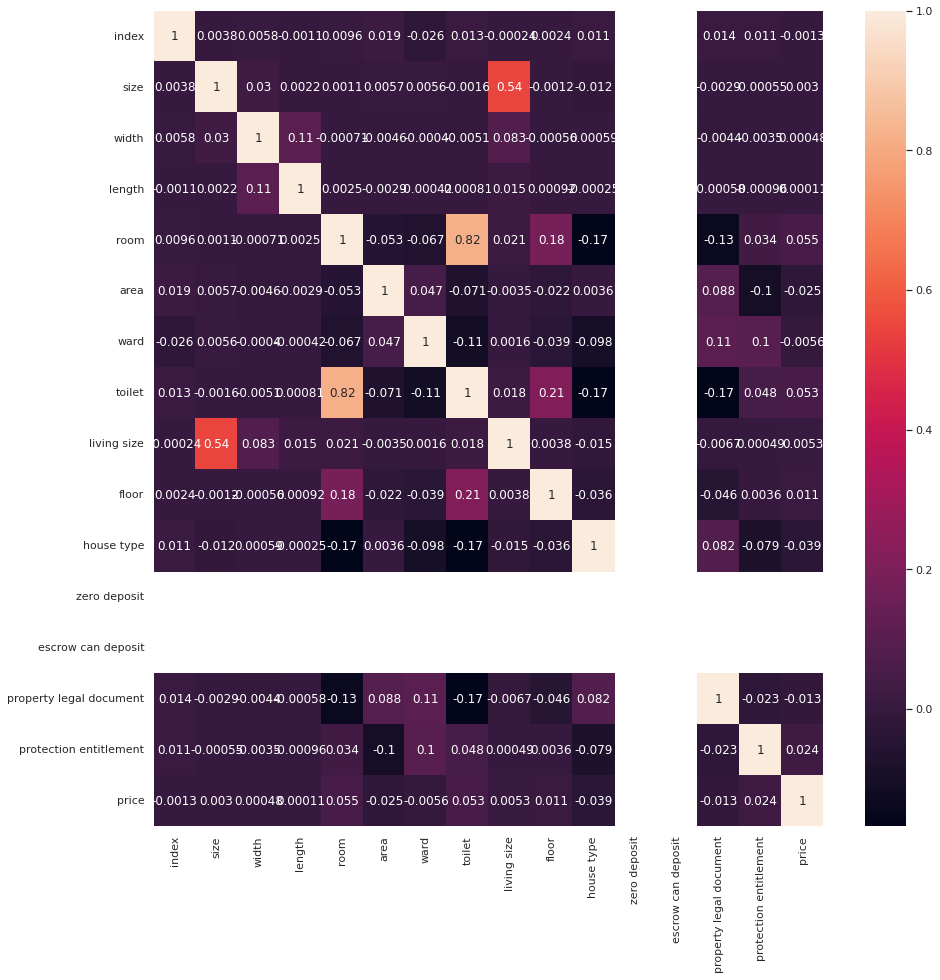

In [ ]:
cormap = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormap, annot = True)

Từ bản đồ nhiệt của ma trận tương quan ở trên, có thể hiểu rằng nhiều thuộc tính đang thể hiện mối tương quan tuyến tính với nhau. Vì vậy, ta có thẻ loại bỏ các sự dư thừa thuộc tính trong tập dữ liệu.

Thông qua ma trận tương quan, có thể thấy được 2 thuộc tính **Zero deposit** vs **Escrow can deposit** không có tương quan tuyến tính với các thuộc tính còn lại trong tập dữ liệu. Vì vậy cần loại bỏ 2 thuộc tính dư thừa ra khỏi tập dữ liệu.

In [ ]:
del data['index']
del data['property legal document']
del data['protection entitlement']
del data['zero deposit']
del data['escrow can deposit']

## Boxplot

In [ ]:
sns.set_theme(style="whitegrid")

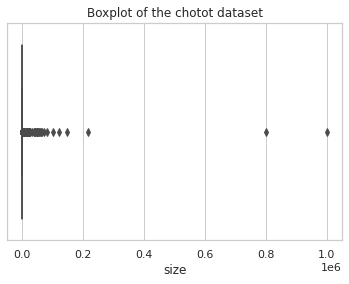

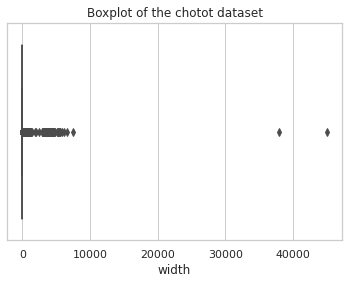

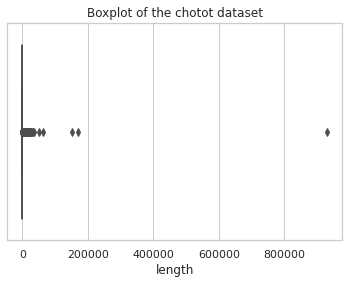

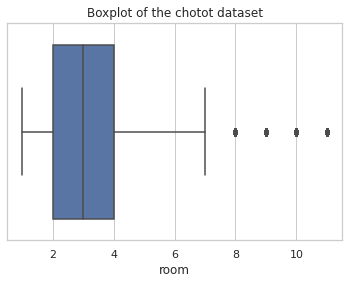

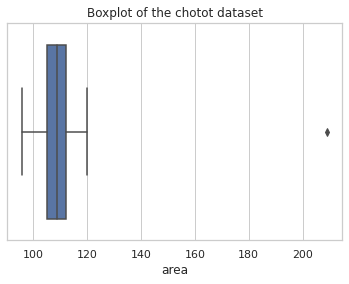

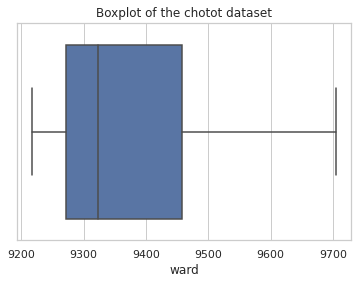

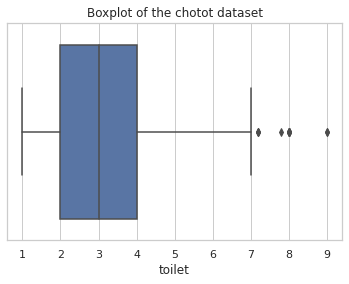

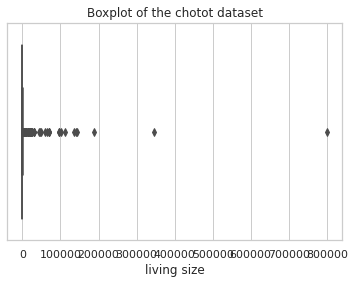

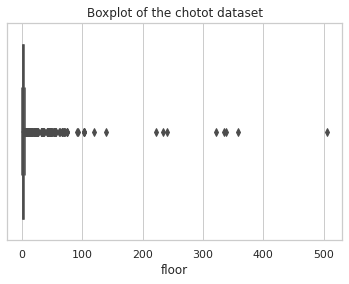

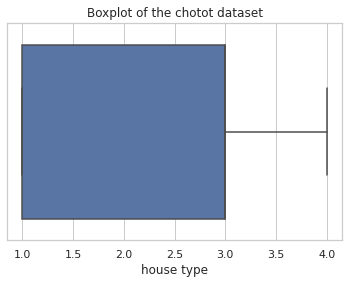

In [ ]:
for i in data.columns[1:11]:
  sns.boxplot(x=data[i])
  plt.title('Boxplot of the chotot dataset')
  plt.show()

In [ ]:
# loại bỏ các giá trị ngoại lai bằng phương pháp phạm vi liên phân vị (IQR)

Q1 = data.quantile(0.25) # 25% dữ liệu đầu tiên
Q3 = data.quantile(0.75) # 75% dữ liệu đầu tiên
IQR = Q3 - Q1 # IQR = InterQuartile Range

scale = 2 # Đối với phân phối thông thường, tỷ lệ = 1,5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (data[data.columns[1:11]] < lower_lim)
upper_outliers = (data[data.columns[1:11]] > upper_lim)

In [ ]:
# kiểm tra các giá trị ngoại lệ kết quả được tính bằng phương pháp trên (được trình bày dưới dạng các giá trị không rỗng)

data[data.columns[1:11]][(lower_outliers | upper_outliers)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95400 entries, 0 to 95399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   size         6043 non-null   float64
 1   width        10294 non-null  float64
 2   length       2607 non-null   float64
 3   room         3157 non-null   float64
 4   area         1 non-null      float64
 5   ward         0 non-null      float64
 6   toilet       2 non-null      float64
 7   living size  3184 non-null   float64
 8   floor        1631 non-null   float64
 9   house type   0 non-null      float64
dtypes: float64(10)
memory usage: 7.3 MB


In [ ]:
# tạo DataFrame mới mà không có các ngoại lệ

num_cols = list(data.columns[2:13])
data_out_IQR = data[~((data[num_cols] < (Q1 - 2 * IQR)) |(data[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]

In [ ]:
data_out_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79187 entries, 0 to 95399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject      79187 non-null  object 
 1   size         79187 non-null  float64
 2   width        79187 non-null  float64
 3   length       79187 non-null  float64
 4   room         79187 non-null  float64
 5   area         79187 non-null  int64  
 6   ward         79187 non-null  float64
 7   toilet       79187 non-null  float64
 8   living size  79187 non-null  float64
 9   floor        79187 non-null  float64
 10  house type   79187 non-null  float64
 11  street       79187 non-null  object 
 12  price        79187 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 8.5+ MB


In [ ]:
temp_data = data_out_IQR.copy()

## Street data processing

In [ ]:
print(temp_data['street'].values)

['Đường Huỳnh Tấn Phát' 'Đường Hoa Sữa' 'Đường Đỗ Xuân Hợp' ... '' '' '']


In [ ]:
streets_data = [street.lower().strip() for street in temp_data['street'].values]
print("Số lượng tên đường null:" , streets_data.count(""))

Số lượng tên đường null: 27272


Lấy danh sách những tên đường chỉ xuất hiện 1 lần và chỉ có 1 ký tự để lọc những tên đường nhập lỗi

In [ ]:
titles_data = temp_data['subject'].values

In [ ]:
streets_count = [[streets_data[i],i] for i in range(len(streets_data)) if streets_data.count(streets_data[i]) == 1 and len(streets_data[i]) == 1]

In [ ]:
ord_streets_remove = [i[1] for i in streets_count if len(i[0]) == 1]
print(ord_streets_remove)

[10032, 20000, 20774, 32251]


In [ ]:
for ord in ord_streets_remove: 
  streets_data[ord] = ""

Lấy danh sách tên đường lưu vào biến streets_ok

In [ ]:
temp_streets = streets_data.copy()
streets_ok = []
for i in range(len(streets_data)):
  if len(streets_data[i]) > 1:
    street_name = streets_data[i]
    if "." in street_name:
      street_name = street_name.replace(".","").strip()
    if "," in street_name:
      street_name = street_name.replace(",","").strip()
    if "//" in street_name:
      street_name = street_name.replace("//","").strip()
    if "  " in street_name:
      street_name = street_name.replace("  "," ").strip()
    if street_name[0:5] == "đường":
      temp_streets[i] = street_name[5:].strip()
      streets_ok.append(street_name[5:].strip())
    else:
      streets_ok.append(street_name)

Dựa vào thống kê tên đường, lọc ra tên đường không đúng

In [ ]:
streets_ok.sort(reverse=True,key=lambda x:len(x))
print(streets_ok)

['số 5 bhh qbình tân gần sieu thị aeon tân phú 42*13hẻm 8m thông 2 đg lớn số5 và số4 khu an ninh dân trí cao nhà lầu đồng bộ 4 tấm đúc 5 pn 4tolet giá 6t8 tl', 'giao lộ ngã tư nguyễn văn linh-phạm hùng (giao lo nga tu nguyen van linh-pham hung)', 'số 8 đường nhựa hẻm 2 xe tài tránh nhau kinh doanh buôn bán khu dân cư đông đúc', '11a đường 149c khu nhà ở điền phúc thành kp trường lưu plong trường tp thủ đức', '67/78 đường số 1 - khu dân cư vĩnh lộc - bình hưng hòa b - quận bình tân - hcm', 'khu dân cư 6b intresco đường phạm hùng nối dài xã bình hưng huyện bình chánh', 'nguyễn cửu phú tân kiên bình chánh thành phố hồ chí minh việt nam', 'mặt tiền đường số 2 khu biệt thự wiu sông hiệp bình phước thủ đức', 'số 23/24 và 23/26 phường hiệp bình phước quận thủ đức hồ chí minh', 'số 61/8/16 đường đào tông nguyên xã phú xuân nhà bè hồ chí minh', 'số 61/8/16 đường đào tông nguyên xã phú xuân nhà bè hồ chí minh', 'đư212 / duong la xuan oai phường long trường quận 9 hồ chí minh', 'nữ dân công liên 

In [ ]:
streets = list(set(streets_ok))
streets = streets[1:]
print(streets)

['hẻm 1 đường bà lài', 'trương thị hoa', 'hẻm 133 ni sư huỳnh liên', 'lê thị đảo', 'tản đà', 'núi thành', 'nguyễn quang diêu', 'lê thị dung', 'đường a8 bình hưng hòa b', 'huỳnh tấn phát (duong huynh tan phat)', 'hẻm 88 đào duy anh', 'thoi an 16', 'đt826e', 'đông thanh 7', '16 linh trung', 'số 35', 'nguyễn thị thập', 'huỳnh tấn phat', 'hẻm 359 lê văn sỹ', 'hẻm 100 đường chiến thắng', 'thiên phước', 'h1', 'mã lò', 'duong so5', 'doan van bo', 'thanh xuân 38', 'đt 2-3', '98', 'hẻm 108 đường 79', 'ht 13', 'tch', 'lê tự tài', 'đường lò gốm', 'nguyễn đình chính', 'tk12', 'lê đức tho', '14a', '803 huỳnh tấn phát pphú thuận quận 7', 'số 8 phường long phước quận 9', 'đường phạm hùng', 'khu bình phú', 'liên khu 8/9', 'ben chuong duong', 'đht08', 'le trọng tấn', 'hẻm 139 đường số 9', 'nguyễn thị kiểu', 'hậu lân 5', 'b1', 'hẻm đường nguyễn hữu thọ', '244', '112', 'hẻm 48 đường 5a', 'phạm hữu lẩu', 'nguyễn văn quỳ', 'số 5 chu văn an', 'đường tân hòa', '535', 's2', 'truông tre', 'xts 

In [ ]:
# streets_remove = ["nhựa","hẻm đường","quận","xe tải","nguyễn","hẻm xe hơi","quận 1","quận 7","quận 10"]
# for i in streets_remove:
#   streets.remove(i)

Cập nhật lại danh sách tên đường dựa vào title

In [ ]:
for ord in range(len(titles_data)):
  if (streets_data[ord] == "") or (len(streets_data[ord]) <= 3) or (len(streets_data[ord]) > 15):
    for street in streets:
      if len(street) > 1:
        if len(street) > 4:
          if street in titles_data[ord].lower().strip():
            temp_streets[ord] = street
            break
        else:
          if "đường " + street in titles_data[ord].lower().strip():
            temp_streets[ord] = street
            break

In [ ]:
print(temp_streets)
print("Số lượng tên đường null:" , temp_streets.count(""))

['huỳnh tấn phát', 'hoa sữa', 'phước long b', 'gò dầu', 'phạm văn chiêu', 'cao lỗ', 'lê đình cẩn', 'đinh bộ lĩnh', 'dương đình nghệ', 'quang trung', 'nguyễn', 'gò cát', 'gò dầu', 'hiệp thành', '', 'tân hoà đông', 'huỳnh văn nghệ', 'nguyễn', 'trần kế xương', 'tx 52', 'lê văn q', 'tôn đản', 'mai văn ngọc', 'bình phú', 'trường lưu', 'trần quang diệu||7336', 'hẻm xe hơi', 'tây thạnh', 'nguyễn', 'kênh nước đen', 'dương đức hiền', 'đội cung', 'phú nhuận', '', 'hương lộ 11', 'hà huy giáp', 'đường số 2', 'nguyễn', 'cầu xây', 'nguyễn xí', 'chu văn an', 'huỳnh tấn phát', 'đinh đức thiện _dt826', 'bình tiên', 'xe tải', 'hoài thanh', 'nguyễn văn quá', 'liên tỉnh 5', 'thống nhất', '9', 'hồ văn tư', 'số 2', 'vạn kiếp', 'bà hom', 'nguyễn cửu phú', 'lê đức thọ', 'nguyễn thị thập', 'quận 8', 'phan đình phùng', 'đoàn văn bơ', 'bùi minh  trực', 'lò gốm', 'hóc môn', '', 'lê văn phan', 'ht17', 'quốc lộ 1', 'phạm văn chiêu', 'phạm văn chiêu', 'hậu giang', 'tân thới', 'vườn lài', 'liên phường phường phú 

Cập nhật lại tên đường mới dựa vào tên đường cũ nếu tên đường cũ quá dài hoặc quá ngắn

In [ ]:
streets.sort(reverse=False,key=lambda x:len(x))
print(streets)

['5', '9', '7', '1', '2', '4', 'b', 'd', '3', 't', '8', 'f', '6', 'h1', '98', 'b1', 's2', 'c4', 'b6', '77', 'ht', 'n2', '39', '48', '20', 'd9', 'bb', 'c1', '21', '67', '6c', '5b', '3d', 't6', '4b', '56', 's7', '22', '55', '25', '33', 'tl', '11', 'le', 'a4', '5e', '1c', 'g8', '26', 'số', 'c7', '6b', 's1', '66', 't8', 'd7', '1a', '51', '2a', 't1', '29', '34', '35', '5d', '14', 'dc', 'b7', 'vl', 'ta', '65', '5k', '41', 'm5', 'đò', '18', '59', '5m', '15', 'xo', 'd4', '23', 'đá', '27', '53', 'd3', '5a', 'd5', '3b', '4c', '97', '19', 'võ', '08', '6a', '47', '43', '7l', 'c2', '45', 'n4', '5f', '60', '40', '64', '5c', '31', 'd2', 's9', '49', 'đs', 's5', 't3', 's3', 'a1', 'n1', 'cv', '92', 'c6', '42', 'b2', 'nx', '3a', 't4', '38', 'hd', 'xx', '9a', '50', '61', '2d', 't9', '12', 'tx', '16', '85', '1b', 't5', '4a', 'a5', '62', '30', 'g7', '17', '10', '81', 'd1', '63', '46', '6d', '32', '7a', '99', 'd8', 'd6', 'm1', '58', '3m', '70', '54', '8c', '8a', '37', '24', '44', 'b3', '87', '13', 'n3', '28'

In [ ]:
final_streets = temp_streets.copy()

In [ ]:
for ord in range(len(temp_streets)):
  if len(temp_streets[ord]) > 15:
    for street in streets:
      if len(street) > 1:
        if len(street) > 4:
          if street in temp_streets[ord].lower().strip():
            final_streets[ord] = street
            break
        else:
          if "đường " + street in temp_streets[ord].lower().strip():
            final_streets[ord] = street
            break

In [ ]:
print(final_streets)

['huỳnh tấn phát', 'hoa sữa', 'phước long b', 'gò dầu', 'phạm văn chiêu', 'cao lỗ', 'lê đình cẩn', 'đinh bộ lĩnh', 'dương đình nghệ', 'quang trung', 'nguyễn', 'gò cát', 'gò dầu', 'hiệp thành', '', 'tân hoà đông', 'huỳnh văn nghệ', 'nguyễn', 'trần kế xương', 'tx 52', 'lê văn q', 'tôn đản', 'mai văn ngọc', 'bình phú', 'trường lưu', 'trần quang diệu', 'hẻm xe hơi', 'tây thạnh', 'nguyễn', 'kênh nước đen', 'dương đức hiền', 'đội cung', 'phú nhuận', '', 'hương lộ 11', 'hà huy giáp', 'đường số 2', 'nguyễn', 'cầu xây', 'nguyễn xí', 'chu văn an', 'huỳnh tấn phát', 'đinh đức thiện', 'bình tiên', 'xe tải', 'hoài thanh', 'nguyễn văn quá', 'liên tỉnh 5', 'thống nhất', '9', 'hồ văn tư', 'số 2', 'vạn kiếp', 'bà hom', 'nguyễn cửu phú', 'lê đức thọ', 'nguyễn thị thập', 'quận 8', 'phan đình phùng', 'đoàn văn bơ', 'bùi minh  trực', 'lò gốm', 'hóc môn', '', 'lê văn phan', 'ht17', 'quốc lộ 1', 'phạm văn chiêu', 'phạm văn chiêu', 'hậu giang', 'tân thới', 'vườn lài', 'phú hữu', 'phó cơ điều', 'hòa bình',

Xóa những dòng dữ liệu street null

In [ ]:
streets_remove = []
for i in range(len(final_streets)):
  if final_streets[i] == "":
    streets_remove.append(i)

In [ ]:
temp_data['street'] = final_streets

In [ ]:
temp_data.sort_values(by='width')

subject   size  width  \
73672      Bán Nhà Mặt Tiền đường số 3 lầu 3Pn 3Wc P4 Q4   17.0    2.0   
56928      Nha1trêt2lâu24mđùöngphanđăng lùu.p3.phú nhuãn    8.0    2.0   
43400                        Nhà mặt tiền Mạc Vân.P13.Q8    8.0    2.0   
41840    Nhà hẻm 160 Phan Huy Ích 60m2 3Pn xe hơi đỗ cửa   60.0    2.0   
26901                  Bán nhà nhỏ ,mềm xèo ,shr quận 11   15.0    2.0   
...                                                  ...    ...    ...   
79659  Nhà Đúc 1 tấm TCH18 Q12 tặng nội thất hẻm 6m t...   60.0    7.0   
11105    Bán nhà mới 100%,Sổ hồng công chứng nhà nước...   21.0    7.0   
11166      DIỆN TÍCH KHỦNG 222M2- GIÁ CHỈ NHỈNH 32TR/M2.  222.0    7.0   
79981            Bán dãy trọ 110m2 TL28, Q.12 chỉ 3,6 tỷ  110.0    7.0   
73364   bán nhà Mặt tiền Bà điểm 11 ngay bến xe An Sương  224.0    7.0   

       length  room  area    ward  toilet  living size  floor  house type  \
73672     7.0   3.0    99  9400.0     2.6         17.0    3.0         1.0   
56928     4.0   2.0   111  9329.0     2.0         24.0    2.4         4.0   
43400     5.0   1.0   103  9448.0     1.0         16.0    1.6         1.0   
41840    15.0   3.0   110  9268.0     3.0        120.0    2.0         3.0   
26901     6.2   1.0   106  9384.0     1.0         30.0    2.0         3.0   
...       ...   ...   ...     ...     ...          ...    ...         ...   
79659     9.0   2.0   107  9231.0     2.0         94.0    1.0         3.0   
11105     3.0   2.0   102  9466.0     2.0         42.0    1.6         3.0   
11166    32.0   2.0   117  9503.0     2.0        205.0    1.0         1.0   
79981    15.0   5.0   107  9228.0     5.0        110.0    1.0         3.0   
73364    30.0   5.0   117  9508.0     6.0        224.0    1.0         1.0   

               street       price  
73672              số  3500000000  
56928                  1150000000  
43400         mạc vân  1300000000  
41840    phan huy ích  5600000000  
26901   lạc long quân  1680000000  
...               ...         ...  
79659           tch18  3860000000  
11105                  1400000000  
11166  nguyễn văn bứa  4600000000  
79981                  3600000000  
73364      bà điểm 11  8700000000  

[79187 rows x 13 columns]

In [ ]:
# final_data = temp_data.drop(streets_remove)
final_data = temp_data

In [ ]:
final_data.sort_values(by='width')

subject   size  width  \
73672      Bán Nhà Mặt Tiền đường số 3 lầu 3Pn 3Wc P4 Q4   17.0    2.0   
56928      Nha1trêt2lâu24mđùöngphanđăng lùu.p3.phú nhuãn    8.0    2.0   
43400                        Nhà mặt tiền Mạc Vân.P13.Q8    8.0    2.0   
41840    Nhà hẻm 160 Phan Huy Ích 60m2 3Pn xe hơi đỗ cửa   60.0    2.0   
26901                  Bán nhà nhỏ ,mềm xèo ,shr quận 11   15.0    2.0   
...                                                  ...    ...    ...   
79659  Nhà Đúc 1 tấm TCH18 Q12 tặng nội thất hẻm 6m t...   60.0    7.0   
11105    Bán nhà mới 100%,Sổ hồng công chứng nhà nước...   21.0    7.0   
11166      DIỆN TÍCH KHỦNG 222M2- GIÁ CHỈ NHỈNH 32TR/M2.  222.0    7.0   
79981            Bán dãy trọ 110m2 TL28, Q.12 chỉ 3,6 tỷ  110.0    7.0   
73364   bán nhà Mặt tiền Bà điểm 11 ngay bến xe An Sương  224.0    7.0   

       length  room  area    ward  toilet  living size  floor  house type  \
73672     7.0   3.0    99  9400.0     2.6         17.0    3.0         1.0   
56928     4.0   2.0   111  9329.0     2.0         24.0    2.4         4.0   
43400     5.0   1.0   103  9448.0     1.0         16.0    1.6         1.0   
41840    15.0   3.0   110  9268.0     3.0        120.0    2.0         3.0   
26901     6.2   1.0   106  9384.0     1.0         30.0    2.0         3.0   
...       ...   ...   ...     ...     ...          ...    ...         ...   
79659     9.0   2.0   107  9231.0     2.0         94.0    1.0         3.0   
11105     3.0   2.0   102  9466.0     2.0         42.0    1.6         3.0   
11166    32.0   2.0   117  9503.0     2.0        205.0    1.0         1.0   
79981    15.0   5.0   107  9228.0     5.0        110.0    1.0         3.0   
73364    30.0   5.0   117  9508.0     6.0        224.0    1.0         1.0   

               street       price  
73672              số  3500000000  
56928                  1150000000  
43400         mạc vân  1300000000  
41840    phan huy ích  5600000000  
26901   lạc long quân  1680000000  
...               ...         ...  
79659           tch18  3860000000  
11105                  1400000000  
11166  nguyễn văn bứa  4600000000  
79981                  3600000000  
73364      bà điểm 11  8700000000  

[79187 rows x 13 columns]

Sử dụng LabelEncoder chuyển dữ liệu sang int

In [ ]:
del final_data['subject']

In [ ]:
encoder_streets = preprocessing.LabelEncoder()
encoder_streets.fit(final_data['street'])
encoded_streets = encoder_streets.transform(final_data['street'])
print(encoded_streets)

[1155 1034 2168 ... 3760 3086 2698]


In [ ]:
final_data['street'] = encoded_streets

In [ ]:
final_data.head()

size  width  length  room  area    ward  toilet  living size  floor  \
0  44.0    3.5    12.0   2.0   102  9466.0     2.0        78.04    1.0   
1  65.0    3.8    17.0   6.0   111  9328.0     6.0       238.00    3.6   
2  44.8    3.2    14.0   2.0   104  9256.0     2.0        44.80    1.0   
5  50.0    4.4    10.6   3.0   113  9317.0     2.0        99.88    2.4   
6  57.0    3.0     9.5   2.0   110  9269.0     2.0        57.00    2.0   

   house type  street        price  
0         3.0    1155   3750000000  
1         1.0    1034  18500000000  
2         3.0    2168    890000000  
5         3.0     951   3000000000  
6         3.0    2211   3380000000

In [ ]:
final_data.to_csv('final_data.csv', index=False, encoding="utf-8-sig")